In [1]:
import os
import time
import numpy as np
import random
from matplotlib import pyplot as plt
from math import exp, cos
import json
from tqdm import tqdm
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.rcParams["axes.labelweight"] = "bold"

In [2]:
## setup parameters and state variables
duration       = 1000                  # total time (msec)
dt      = 0.100                      # time step (msec)
time    = np.arange(0, duration+dt, dt) # time array
t_rest  = 1                          # initial refractory time

In [3]:
## LIF properties
Vm      = np.zeros(len(time))    # potential (V) trace over time 
Rm      = 1                   # resistance (kOhm)
#Cm      = 20                  # capacitance (uF)
tau_m   = 20 #Rm*Cm               # time constant (msec)
tau_ref = 1                   # refractory period (msec)
Vth     = 2                   # spike threshold (V)
V_spike = 1                 # spike delta (V)

In [4]:
## First Input stimulus
minI = 0.0      # beggining time (ms)
maxI = 100.0     # End input (ms)
Input = 0.0   # input current (A)

In [5]:
## Second Input stimulus
minI2 = 500.0      # beggining time (ms)
maxI2 = 600.0     # End input (ms)
Input2 = 2.0   # input current (A)

In [6]:
## Set Input for each step
Il = np.zeros(len(time))
#Il = np.random.normal(10,5,len(time)) # for random/noisy inputs

Il[int(minI/dt):int(maxI/dt)] = Input
Il[int(minI2/dt):int(maxI2/dt)] = Input2

In [7]:
## Set noise
N = 0.02

In [ ]:
H = 0.05

In [8]:
## iterate over each time step
it=0
nspike=np.zeros(int(duration/dt)+1)
for i, t in enumerate(time):
    
    if t > t_rest:
        Vm[i] = Vm[i-1] + Il[it]*Rm / tau_m * dt + Il[it]*Rm / tau_m * dt**2 + np.random.normal(0, N)
        if Vm[i]>=Vth:
            nspike[it] = 1
            #print('spike!',t)
    
    if Vm[i] >= Vth:
        Vm[i] += V_spike
        t_rest = t + tau_ref
    
    
    #Il[i] += tau_m/(tau_d-tau_r) * () + H 
    
    
    
    
    
    
    
    it+=1

In [9]:
## rate calculation
ratio=np.zeros(len(nspike))
for x in enumerate(nspike):
    #print(x)
    if x[0] <= 10 :
        y = np.sum(nspike[:5])/5
        #print(y)
    elif x[0] > 10 :
        y = np.sum(nspike[x[0]:x[0]+500])/1000
    ratio[x[0]]=y

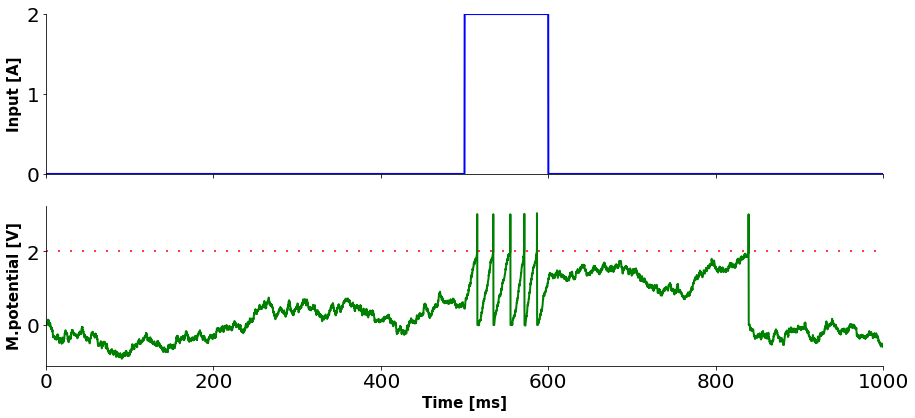

In [10]:
## Membrane potential and Input trace
fig = plt.figure(figsize=(15,10))

ax1 = plt.subplot(311)
ax1.set_ylim(0,2)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_ylabel('Input [A]',fontsize=15,fontweight='bold')
plt.plot(time,Il,'b',linewidth=2)

    # share x only
ax2 = plt.subplot(312, sharex=ax1)
ax2.set_ylabel('M.potential [V]',fontsize=15,fontweight='bold')
ax2.set_xlabel('Time [ms]',fontsize=15,fontweight='bold')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.plot(time, Vm,'g',linewidth=2)
ax2.plot((time[0], duration), (Vth, Vth), 'r',linestyle=':', dashes=(1, 5)) # put the treshold level
plt.setp(ax1.get_xticklabels(), visible=False)

# make these tick labels invisible
plt.setp(ax1.get_xticklabels(), visible=False)

#ax3 = plt.subplot(313, sharex=ax1)
#ax3.set_ylim(2,5)
#ax3.set_ylabel('Firing rate [Hz]',fontsize=15,fontweight='bold')
#ax3.set_xlabel('Time [ms]',fontsize=15,fontweight='bold')
#plt.plot(time, ratio,'r',linewidth=2)

plt.autoscale(enable=True, axis='x', tight=True)
plt.show()